In [2]:
import pandas as pd
import numpy as np

In [26]:
for i in np.load('clusters/'+'public_transport'+'_'+'los angeles'+'_cluster.npy'):
    print(i)

['8' '31.190489475' '-92.61279808750001' '71424']
['7' '33.11149198571429' '-94.1191846' '75572']
['10' '32.07579263' '-98.75839445' 'N/A']
['7' '31.84925942857143' '-106.42394942857143' '79904']
['7' '31.404777857142857' '-103.56251985714286' '79772']
['7' '31.42556242857143' '-103.55945042857142' 'N/A']
['7' '30.79121471428571' '-100.68295514285715' 'N/A']
['7' '31.328867857142853' '-103.62144585714285' '79772']
['9' '35.41062933333333' '-97.18629133333334' '74857']
['8' '35.6413125' '-94.569630375' 'N/A']
['9' '35.68179007777778' '-93.70591272222221' '72949']
['9' '35.67680291111112' '-93.70307341111112' 'N/A']
['7' '35.56468158571428' '-95.72443978571428' 'N/A']
['12' '35.79140358333333' '-91.99807849999998' '72560']
['7' '35.461008428571425' '-95.10623251428571' 'N/A']
['8' '35.92652625' '-90.67774075' '72401']
['7' '35.549046000000004' '-95.74708085714285' 'N/A']
['21' '35.54971695238095' '-95.75655428571429' 'N/A']
['8' '35.62874925' '-94.632121375' 'N/A']
['7' '35.5555564285714

In [4]:

venues = pd.read_csv('data/venues_w_zip.csv')
listings = pd.read_csv('data/listings.csv')
calendar = pd.read_csv('data/calendar.csv')

In [5]:
multi_owner = listings.groupby('host_id').filter(lambda x:len(x) > 1)
single_owner = listings.groupby('host_id').filter(lambda x:len(x) == 1)

In [6]:
calendar['available'] = calendar['available'].replace('f', 0)
calendar['available'] = calendar['available'].replace('t', 1)

In [7]:
ratios = calendar.groupby(['listing_id'])['available'].sum()/calendar.groupby('listing_id')['available'].count()

In [17]:
ratios.to_frame().merge(single_owner['id'], left_on='listing_id', right_on='id')['available'].mean()

0.4626070822312582

In [18]:
ratios.to_frame().merge(multi_owner['id'], left_on='listing_id', right_on='id')['available'].mean()

0.6221654169851841

In [ ]:
data = listings.merge(venues, how='inner', left_on='id', right_on='listing_id')

In [3]:
all_dist_ratio = pd.read_csv('all_dist_availablity2.csv')
listings_demo = pd.read_csv('data/df_listings_demographics.csv')
calendar = pd.read_csv('data/calendar.csv')

In [6]:
calendar['available'] = calendar['available'].replace('f', 0)
calendar['available'] = calendar['available'].replace('t', 1)
ratios = calendar.groupby(['listing_id'])['available'].sum()/calendar.groupby('listing_id')['available'].count()
all_dist_ratio = all_dist.merge(ratios, how='inner', left_on='id', right_on='listing_id')

In [11]:
listings_demo

,Unnamed: 0,id,children,young_adults,low_income,medium_income
0,1,2746729,0.190200,0.340500,16.8,27.0
1,3,12286328,0.190200,0.340500,16.8,27.0
2,4,156926,0.190200,0.340500,16.8,27.0
3,5,3767793,0.190200,0.340500,16.8,27.0
4,15,3645277,0.190200,0.340500,16.8,27.0
...,...,...,...,...,...,...
22393,50306,15860751,0.177491,0.244908,7.0,24.4
22394,50307,1312336,0.161562,0.290103,8.9,29.5
22395,50309,17302014,0.177491,0.244908,7.0,24.4
22396,50312,18477878,0.266360,0.281628,13.2,30.3


In [19]:
merged = listings_demo.merge(ratios,how='inner', left_on='id', right_on='listing_id')
multi_owner = listings.groupby('host_id').filter(lambda x:len(x) > 1)
merged = merged.merge(multi_owner, how='inner', left_on='id', right_on='id')

In [20]:
merged.drop('Unnamed: 0',axis=1, inplace=True)

In [32]:
merged['price'] = merged['price'].str.replace('$','').str.replace(',','').astype('float') 
merged['weekly_price'] = merged['weekly_price'].str.replace('$','').str.replace(',','').astype('float')

In [33]:
correl = merged[merged['metropolitan'] == 'austin'][['available','price','children','young_adults','low_income','medium_income']].corr()

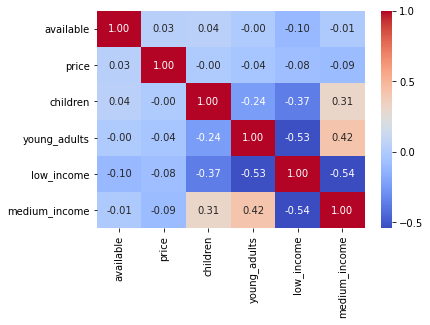

<Figure size 11520x5760 with 0 Axes>

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correl,annot=True, fmt = ".2f", cmap = "coolwarm")
plt.xticks(rotation = 90)
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize = (160, 80))
plt.savefig('demo_corr.pdf')

In [22]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 10)
    return pvalues


In [26]:
merged

,id,children,young_adults,low_income,medium_income,available,accommodates,amenities,availability_30,bathrooms,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2746729,0.190200,0.340500,16.8,27.0,0.624658,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,...,10.0,10.0,10.0,9.0,96.0,9.0,Entire home/apt,NC,NaN,28806.0
1,12286328,0.190200,0.340500,16.8,27.0,0.989041,6.0,"{Internet,""Wireless Internet"",""Air Conditionin...",28,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,Shared room,NC,NaN,28806.0
2,156926,0.190200,0.340500,16.8,27.0,0.967123,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,...,10.0,9.0,9.0,9.0,93.0,10.0,Shared room,NC,NaN,28806.0
3,3767793,0.190200,0.340500,16.8,27.0,0.923288,10.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,2.5,...,9.0,8.0,9.0,8.0,78.0,8.0,Entire home/apt,NC,"$1,550.00",28806.0
4,3645277,0.190200,0.340500,16.8,27.0,0.915068,4.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",18,1.0,...,10.0,10.0,10.0,9.0,93.0,9.0,Private room,NC,NaN,28806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22393,15860751,0.177491,0.244908,7.0,24.4,0.849315,10.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",16,2.0,...,10.0,7.0,9.0,10.0,70.0,8.0,Entire home/apt,CA,NaN,91364
22394,1312336,0.161562,0.290103,8.9,29.5,0.857534,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,1.0,...,10.0,9.0,10.0,9.0,91.0,9.0,Entire home/apt,CA,NaN,91367
22395,17302014,0.177491,0.244908,7.0,24.4,0.750685,2.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,CA,NaN,91364
22396,18477878,0.266360,0.281628,13.2,30.3,0.046575,4.0,"{TV,""Air conditioning"",Kitchen,""Free parking o...",13,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,CA,NaN,90744
